# Analysis of variance (ANOVA)

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print('Current working directory:', os.getcwd())

Current working directory: /workspaces/data_analytics/Week_06


## Read example data (used car data)

In [2]:
# Read data
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='anova_data')

# Show categories of 'Make'
print(df['Make'].value_counts())

# Show header
df.head()

Make
VW      20
BMW     20
Fiat    20
Name: count, dtype: int64


,Make,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create pivot table of mean price per make

In [3]:
# Create pivot table
table = pd.pivot_table(df, 
                       values='Price',
                       columns=['Make'], 
                       aggfunc=np.mean)
print(table)

Make     BMW   Fiat     VW
Price  54000  34000  41950


## Create grouped boxplot (groups = make, values = prices)

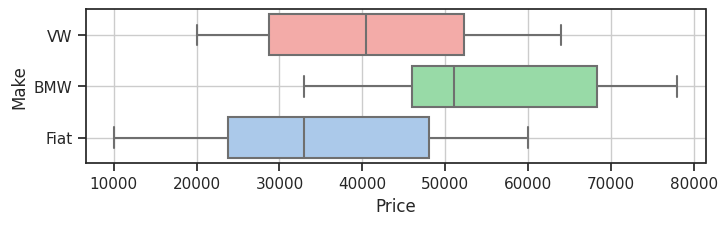

In [4]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Make",
                 palette=['r', 'g', 'b'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Analysis of variance (ANOVA)

In [5]:
# Create subsets (groups)
vw = df.loc[df['Make'] == 'VW']
bmw = df.loc[df['Make'] == 'BMW']
fiat = df.loc[df['Make'] == 'Fiat']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(vw['Price'],
                                fiat['Price'], 
                                bmw['Price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 9.791 p-value 0.0002


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW and Fiat differ. Note that, from the ANOVA, it is not clear which groups show differences of prices. For this a post-hoc test could be used (not part of the exercises).</p>

## Importing apartment data

In [6]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched_cleaned.csv', 
                 sep=';', 
                 encoding='utf-8')[['web-scraper-order',
                                    'address_raw',
                                    'lat',
                                    'lon',
                                    'bfs_number',
                                    'bfs_name',
                                    'rooms', 
                                    'area', 
                                    'luxurious', 
                                    'price', 
                                    'price_per_m2',
                                    'pop_dens',
                                    'frg_pct',
                                    'mean_taxable_income',
                                    'dist_supermarket']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(774, 15)


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create pivot table with mean price_per_m2 per room size

In [7]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price_per_m2']],
               index=['rooms'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
rooms,,
1.0,47.140400,50
1.5,59.417576,33
2.0,40.757105,38
2.5,37.391631,141
3.0,28.677955,44
3.5,29.942956,203
4.0,29.646429,28
4.5,26.493436,163


## Create grouped boxplot (groups = rooms, values = prices_per_m2)

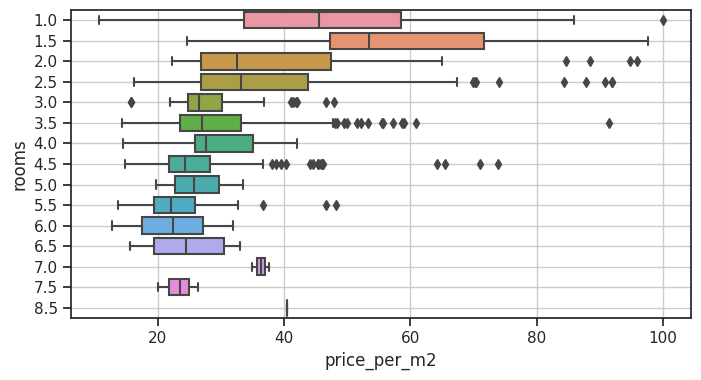

In [8]:
# Plot boxplot with groups
plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price_per_m2",
                 y="rooms",
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## ANOVA to compare the price_per_m2 per number of rooms (= groups)

In [9]:
# Create subsets (groups)
r2_5 = df.loc[df['rooms'] == 2.5]['price_per_m2']
r3_5 = df.loc[df['rooms'] == 3.5]['price_per_m2']
r4_5 = df.loc[df['rooms'] == 4.5]['price_per_m2']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(r2_5, r3_5, r4_5)

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 34.26 p-value 0.0


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the price per m2 differ between apartments with 2.5, 3.5 and 4.5 rooms. Note that, from the ANOVA, it is not clear which groups show price differences. For this a post-hoc test could be used (not part of the exercises).</p>

In [11]:
low = df.loc[df['pop_dens'] <= 600]
mod = df.loc[(df['pop_dens'] > 600) & (df['pop_dens'] <= 1500)]
high = df.loc[df['pop_dens'] > 1500]

fvalue, pvalue = stats.f_oneway(low['price_per_m2'], mod['price_per_m2'], high['price_per_m2'])

print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 91.272 p-value 0.0


<p>Nullhypothese = Einwohnerdichte hat keinen Einfluss auf den Preis pro m2<p>
Alternativhypothese = Einwohnerdichte hat einen Einfluss auf den Preis pro m2<p>
Signifikanz = 5%<p>
Da der P-Wert unter 0.05 ist kann die Nullhypothese verworfen werden, die Dichte hat also Eifluss auf den Preis pro m2.<p>

In [13]:
fvalue, pvalue = stats.f_oneway(low['rooms'], mod['rooms'], high['rooms'])

print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 41.043 p-value 0.0


<p>Nullhypothese = Einwohnerdichte hat keinen Einfluss auf die Fläche<p>
Alternativhypothese = Einwohnerdichte hat einen Einfluss auf die Fläche<p>
Signifikanz = 5%<p>
Da der P-Wert unter 0.05 ist kann die Nullhypothese verworfen werden, die Dichte hat also Eifluss auf die Fläche.<p>

In [ ]:
fvalue, pvalue = stats.f_oneway(low['area'], mod['area'], high['area'])

print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

<p>Nullhypothese = Einwohnerdichte hat keinen Einfluss auf die Anzahl Räume<p>
Alternativhypothese = Einwohnerdichte hat einen Einfluss auf die Anzahl Räume<p>
Signifikanz = 5%<p>
Da der P-Wert unter 0.05 ist kann die Nullhypothese verworfen werden, die Dichte hat also Eifluss auf die Anzahl Räume.<p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')